# Scoring evaluation

In [388]:
from katlas.core import *
import pandas as pd

Load references:

In [393]:
pspa = pd.read_parquet('raw/overlap_pspa.parquet')

In [394]:
LO = pd.read_parquet('out/CDDM_pssms_LO_eval_psp_02.parquet')

In [395]:
LO.index = LO.index.str.split('_').str[1]
pspa.index = pspa.index.str.split('_').str[1]

In [396]:
LO = LO[LO.index.isin(pspa.index)].copy()

In [397]:
LO.shape

(312, 943)

In [257]:
# log odds
LO = pd.read_parquet('out/CDDM_pssms_LO.parquet').loc[pspa.index]
LO_upper = pd.read_parquet('out/CDDM_pssms_LO_eval_upper.parquet').loc[pspa.index]

In [15]:
# CDDM pssms
pssms = pd.read_parquet('out/CDDM_pssms_eval.parquet').loc[pspa.index]
pssms_upper = pd.read_parquet('out/CDDM_pssms_eval_upper.parquet').loc[pspa.index]

In [258]:
LO.shape,LO_upper.shape,pssms.shape,pssms_upper.shape

((312, 943), (312, 943), (312, 943), (312, 943))

In [71]:
pspa.index.str.split('_').str[1].duplicated().sum()

np.int64(0)

In [219]:


LO.index = LO.index.str.split('_').str[1]
LO_upper.index = LO_upper.index.str.split('_').str[1]

pssms.index = pssms.index.str.split('_').str[1]
pssms_upper.index = pssms_upper.index.str.split('_').str[1]

## Log-odds + sum

In [4]:
predict_kinase("PSVEPPLsQETFSDL",ref = LO,func=sumup)

considering string: ['-7P', '-6S', '-5V', '-4E', '-3P', '-2P', '-1L', '0s', '1Q', '2E', '3T', '4F', '5S', '6D', '7L']


index
Q13535_ATR        11.215
Q13315_ATM        10.362
P78527_DNAPK       6.586
O96017_CHK2        2.101
P49840_GSK3A       1.719
                  ...   
Q6P2M8_CAMK1B    -90.700
O00311_CDC7      -90.895
Q9NYV4_CDK12    -107.828
P15056_BRAF     -135.335
Q59H18_TNNI3K   -139.231
Length: 333, dtype: float64

In [5]:
# upper
predict_kinase("PSVEPPLsQETFSDL",ref = LO_upper,func=sumup)

considering string: ['-7P', '-6S', '-5V', '-4E', '-3P', '-2P', '-1L', '0s', '1Q', '2E', '3T', '4F', '5S', '6D', '7L']


index
Q13535_ATR        10.045
Q13315_ATM         8.797
P78527_DNAPK       5.814
O96017_CHK2        3.416
P49761_CLK3        2.908
                  ...   
O75385_ULK1      -67.640
Q9NYV4_CDK12     -67.855
Q6P2M8_CAMK1B    -73.139
Q59H18_TNNI3K    -97.097
P15056_BRAF     -114.566
Length: 333, dtype: float64

## PSSM + multiply

In [6]:
# standard
predict_kinase("PSVEPPLsQETFSDL",ref = pssms,func=multiply_23)

considering string: ['-7P', '-6S', '-5V', '-4E', '-3P', '-2P', '-1L', '0s', '1Q', '2E', '3T', '4F', '5S', '6D', '7L']


index
Q13535_ATR        15.288
Q13315_ATM        14.435
P78527_DNAPK      10.660
O96017_CHK2        6.174
P49840_GSK3A       5.792
                  ...   
Q6P2M8_CAMK1B    -86.627
O00311_CDC7      -86.822
Q9NYV4_CDK12    -103.755
P15056_BRAF     -131.262
Q59H18_TNNI3K   -135.158
Length: 333, dtype: float64

In [7]:
# upper
predict_kinase("PSVEPPLSQETFSDL",ref = pssms_upper,func=multiply_20)

considering string: ['-7P', '-6S', '-5V', '-4E', '-3P', '-2P', '-1L', '0S', '1Q', '2E', '3T', '4F', '5S', '6D', '7L']


index
Q13535_ATR        14.817
Q13315_ATM        13.569
P78527_DNAPK      10.586
O96017_CHK2        8.188
P49761_CLK3        7.680
                  ...   
O75385_ULK1      -62.868
Q9NYV4_CDK12     -63.083
Q6P2M8_CAMK1B    -68.367
Q59H18_TNNI3K    -92.325
P15056_BRAF     -109.794
Length: 333, dtype: float64

## Evaluate on test set

In [398]:
df =pd.read_parquet('out/CDDM_test_set.parquet')

In [399]:
df['site_seq_upper'] = df.site_seq.str.upper()

In [400]:
df = df[df.kinase_protein.isin(pspa.index)].copy()

In [401]:
df.shape

(2484, 24)

In [339]:
ks = Data.get_ks_dataset()

In [338]:
df_tyr.source.value_counts()

source
Sugiyama                            7435
EPSD|PSP                              77
SIGNOR|EPSD|PSP                       67
SIGNOR|ELM|iPTMNet|EPSD|PSP           49
GPS6|SIGNOR|ELM|iPTMNet|EPSD|PSP      41
                                    ... 
SIGNOR|EPSD|PSP|Sugiyama               1
GPS6|SIGNOR|ELM|EPSD                   1
GPS6|ELM|EPSD|Sugiyama                 1
SIGNOR|iPTMNet                         1
iPTMNet|PSP                            1
Name: count, Length: 65, dtype: int64

In [402]:
df_tyr = df[df.kinase_group =='TK'].copy().reset_index(drop=True)
df_st = df[df.kinase_group !='TK'].copy().reset_index(drop=True)

In [367]:
df_tyr.site_seq.str[20].value_counts()

site_seq
y    380
s      4
t      2
Name: count, dtype: int64

In [369]:
df_st.site_seq.str[20].value_counts()

site_seq
s    1512
t     570
y      16
Name: count, dtype: int64

In [403]:
df_tyr = df_tyr[df_tyr.site_seq.str[20]=='y'].copy().reset_index(drop=True)

In [404]:
df_st = df_st[df_st.site_seq.str[20]!='y'].copy().reset_index(drop=True)

In [371]:
df_tyr.shape

(380, 24)

In [372]:
df_st.shape

(2082, 24)

In [155]:
data = Data.get_ks_dataset()

In [159]:
psp = data[data.source.str.contains('PSP')].copy()

In [164]:
psp = psp[psp.kinase_protein.isin(pspa.index)].copy()

In [166]:
psp_tyr = psp[psp.kinase_group =='TK'].copy().reset_index(drop=True)

In [168]:
psp_st = psp[psp.kinase_group !='TK'].copy().reset_index(drop=True)

In [169]:
psp_tyr.shape,psp_st.shape

((1964, 21), (10675, 21))

## Scoring

### PSPA PSSM + multiply

### PSPA PSSM + multiply + pct

### CDDM PSSM + multiply

### CDDM PSSM + multiply + pct

### CDDM LO + sumup

### CDDM LO + sumup + pct

### CDDM PSSM upper + multiply

### CDDM PSSM upper + multiply + pct

### CDDM LO upper + sumup

### CDDM LO upper + sumup + pct

## Implement

PSPA upper + multiply

In [81]:
df.kinase_protein

0         SGK1
1         SGK1
2         SGK1
3         SGK1
4         SGK1
         ...  
17944    CK1G3
17945    CK1G3
17946    CK1G3
17947    CK1G3
17948    CK1G3
Name: kinase_protein, Length: 17949, dtype: object

In [405]:
group_map = df[['kinase_protein','kinase_group']].drop_duplicates().set_index('kinase_protein')['kinase_group']

In [406]:
TK = group_map[group_map=='TK'].index
ST = group_map[group_map!='TK'].index

In [90]:
pspa_tk = pspa[pspa.index.isin(TK)].copy()
pspa_st = pspa[pspa.index.isin(ST)].copy()

In [407]:
LO_tk = LO[LO.index.isin(TK)].copy()

In [408]:
LO_tk.shape

(71, 943)

In [409]:
out = predict_kinase_df(df_tyr,seq_col='site_seq',ref=LO_tk,func=sumup)

input dataframe has a length 380
Preprocessing
Finish preprocessing
Merging reference
Finish merging


In [410]:
def get_kinase_rank(row_index,df):
    kinase = df.loc[row_index, 'kinase_protein']
    scores = out.loc[row_index]
    ranked = scores.sort_values(ascending=False)
    rank = ranked.index.get_loc(kinase) + 1  # +1 to make rank start from 1
    return rank

In [411]:
df_tyr['rank'] = out.index.to_series().apply(lambda idx: get_kinase_rank(idx,df_tyr))

In [412]:
df_tyr['rank'].mean()

np.float64(22.426315789473684)

In [378]:
df_tyr['rank'].mean()

np.float64(24.739473684210527)

## Top 5/10

In [379]:
def top_k_accuracy(reference_df, result_df, k):
    def is_in_top_k(row_index):
        kinase = reference_df.loc[row_index, 'kinase_protein']
        scores = result_df.loc[row_index]
        top_k = scores.nlargest(k).index
        return kinase in top_k

    return result_df.index.to_series().apply(is_in_top_k).mean()

In [380]:
top1 = top_k_accuracy(df_tyr, out, 1)
top5 = top_k_accuracy(df_tyr, out, 5)
top10 = top_k_accuracy(df_tyr, out, 10)

In [381]:
print(f"Top-1 accuracy:  {top1:.3f}")
print(f"Top-5 accuracy:  {top5:.3f}")
print(f"Top-10 accuracy: {top10:.3f}")

Top-1 accuracy:  0.087
Top-5 accuracy:  0.287
Top-10 accuracy: 0.382


### Groupby kinase subfamily

In [382]:
reference_df =df_tyr.copy()

In [383]:
result_df = out.copy()

In [384]:
def top_k_accuracy_group(group_indices, k):
    def is_correct(row_index):
        kinase = reference_df.loc[row_index, 'kinase_protein']
        scores = result_df.loc[row_index]
        top_k = scores.nlargest(k).index
        return kinase in top_k

    return pd.Series(group_indices).apply(is_correct).mean()

In [385]:
# Group indices by subfamily
grouped = df_tyr.groupby('kinase_subfamily').groups  # dict: subfamily → list of indices

# Compute accuracy per subfamily
topk_scores = {
    subfam: top_k_accuracy_group(indices, k=10)
    for subfam, indices in grouped.items()
}

# Convert to DataFrame for easy viewing
topk_df = pd.DataFrame.from_dict(topk_scores, orient='index', columns=['topk_accuracy']).sort_values('topk_accuracy', ascending=False)


<Axes: >

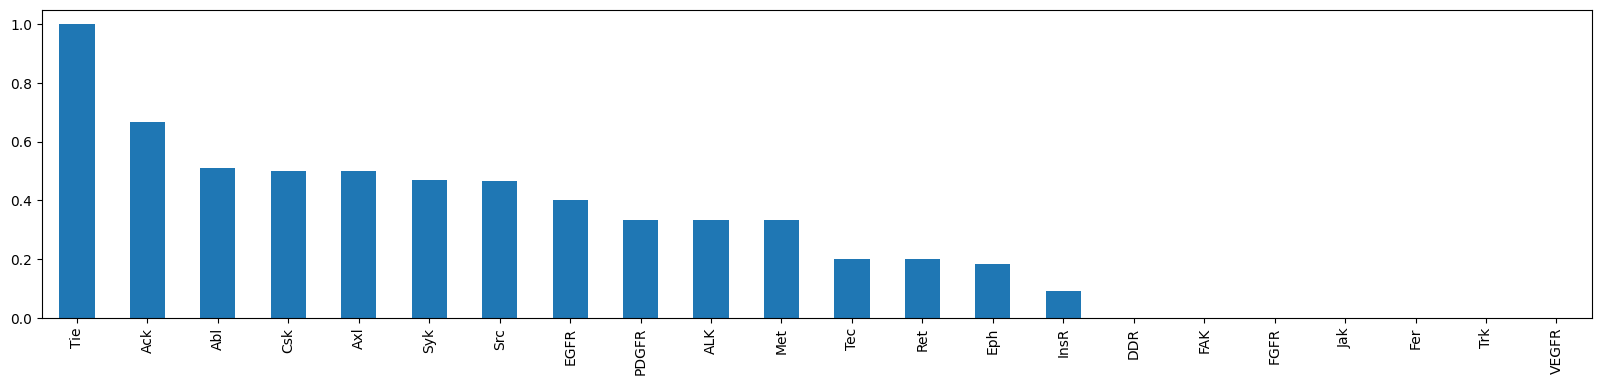

In [386]:
topk_df['topk_accuracy'].plot.bar(figsize=(20,4))
# TODO: add hue

By kinase group?

## Bar plot of rank across kinase group

In [17]:
data.columns

Index(['kin_sub_site', 'substrate_uniprot', 'site', 'source',
       'substrate_genes', 'substrate_phosphoseq', 'position', 'site_seq',
       'sub_site', 'substrate_sequence', 'kinase_on_tree', 'kinase_genes',
       'kinase_group', 'kinase_family', 'kinase_subfamily', 'kinase_pspa_big',
       'kinase_pspa_small', 'kinase_coral_ID', 'num_kin', 'kinase_id',
       'source_len', 'kinase_uniprot', 'rank'],
      dtype='object')

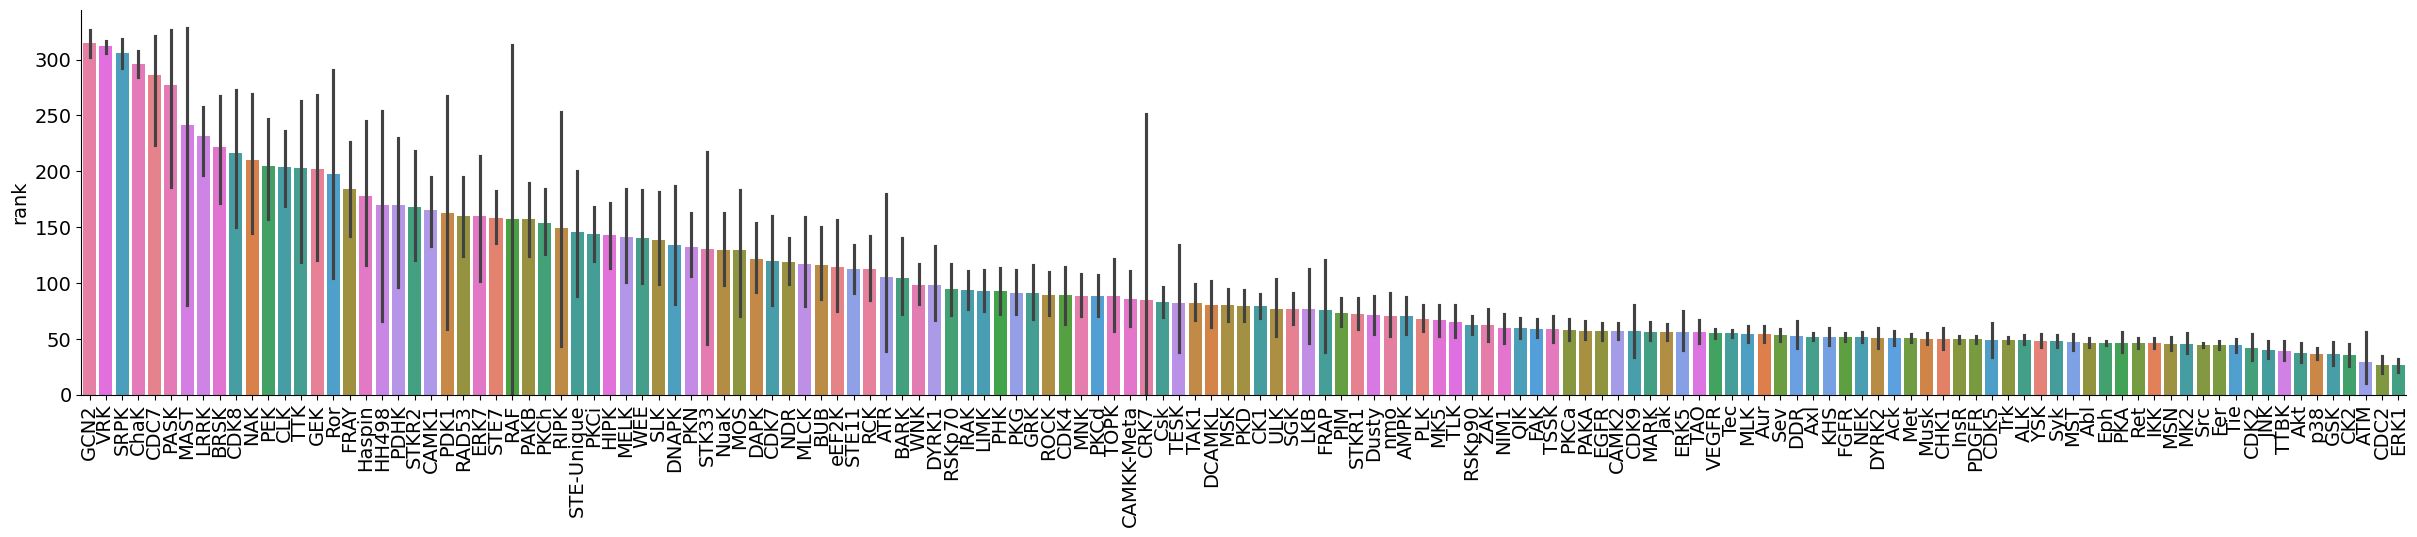

In [23]:
plot_bar(data,value='rank',group='kinase_subfamily',dots=False,figsize = (30,5))

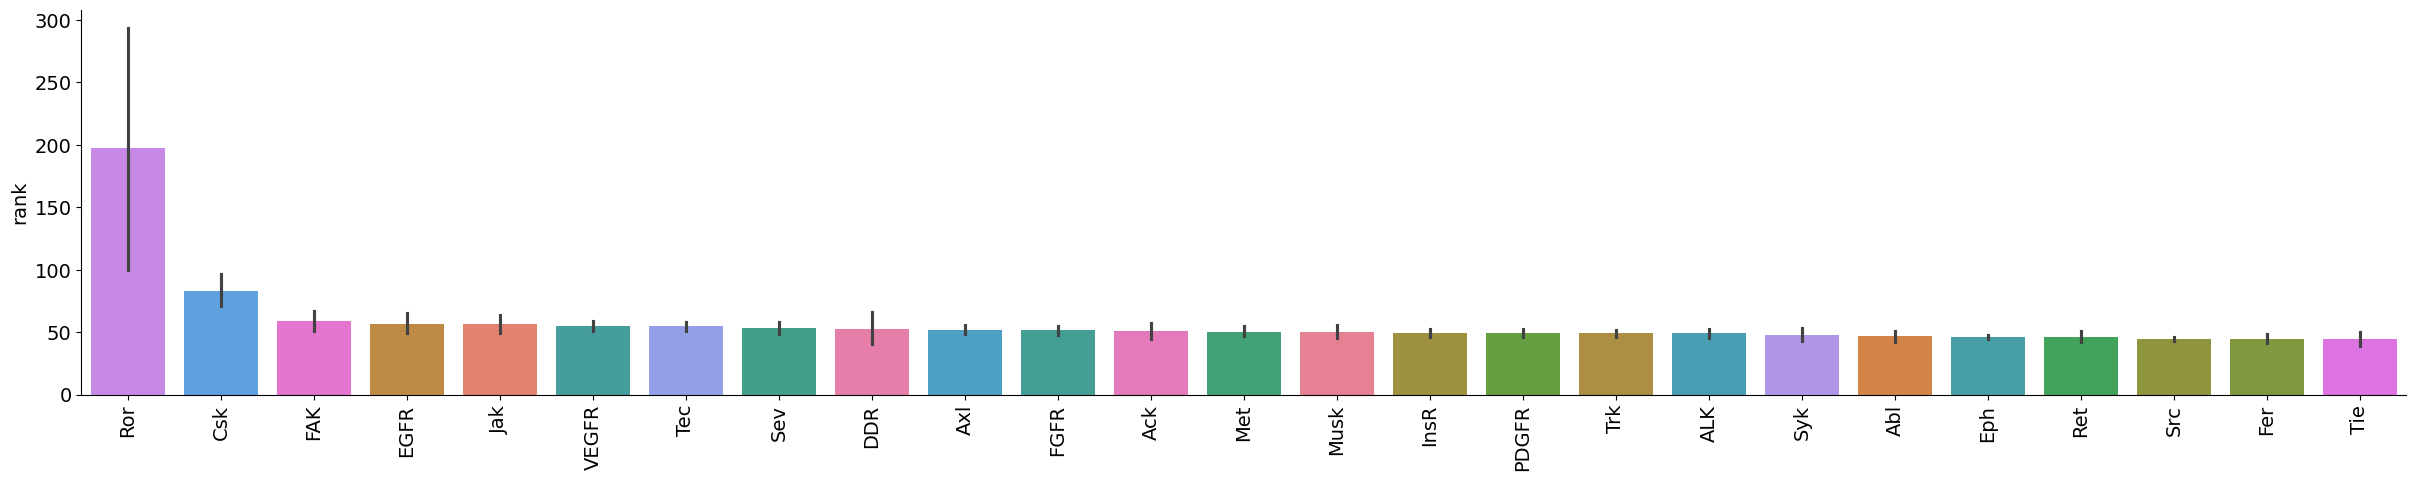

In [67]:
plot_bar(data[data.kinase_group=='TK'],value='rank',group='kinase_subfamily',dots=False,figsize = (30,5))

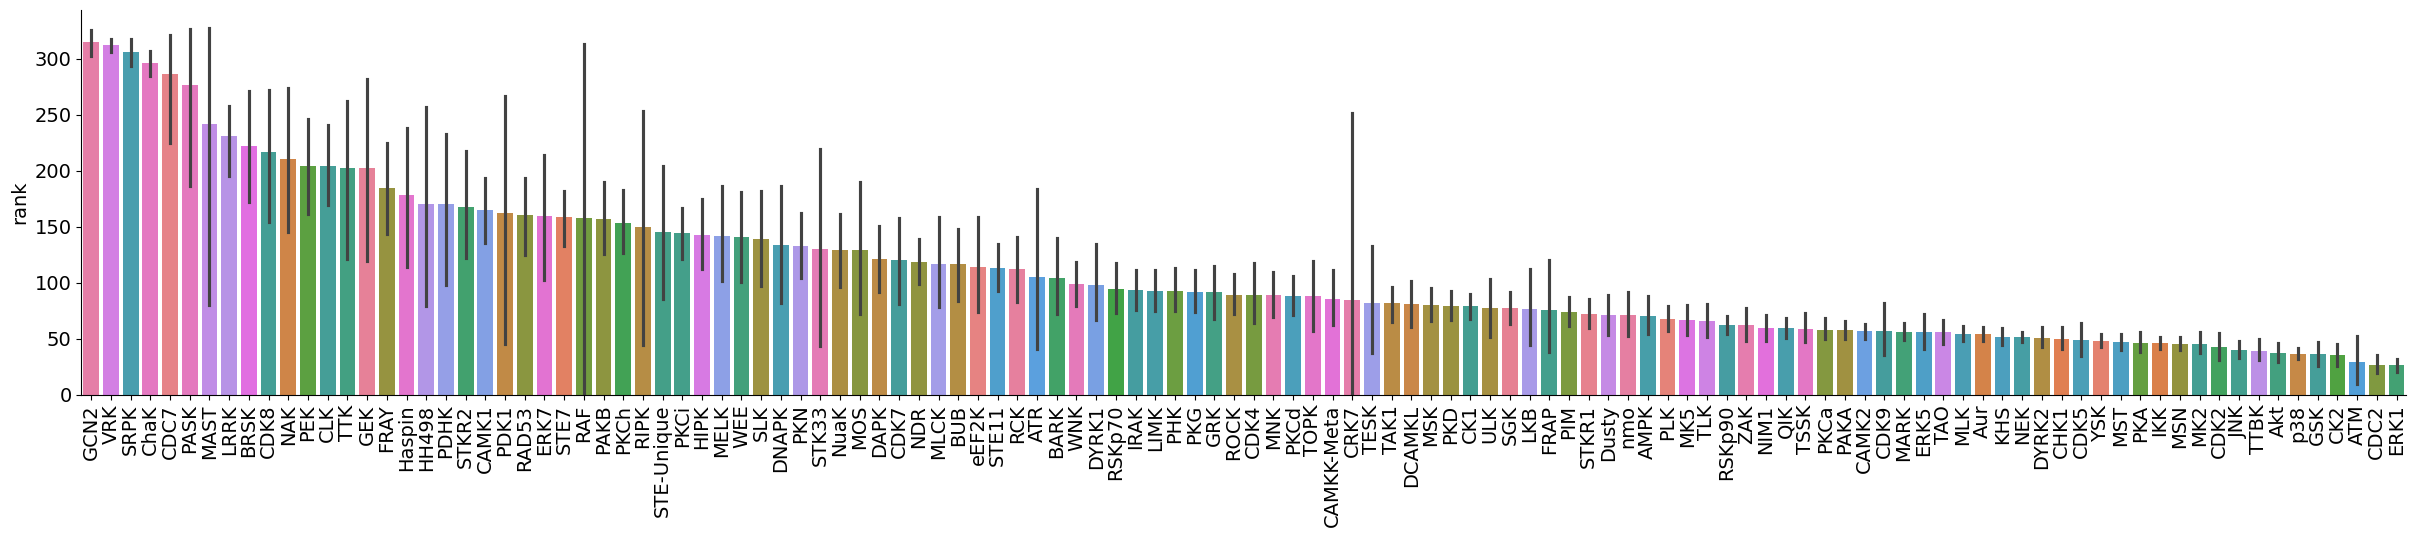

In [68]:
plot_bar(data[data.kinase_group!='TK'],value='rank',group='kinase_subfamily',dots=False,figsize = (30,5))

## AUCDF

In [20]:
from katlas.plot import *

In [309]:
import numpy as np

In [346]:
psp_tyr.source.value_counts()

source
EPSD|PSP                                     482
PSP                                          344
SIGNOR|EPSD|PSP                              287
SIGNOR|PSP                                   195
SIGNOR|ELM|iPTMNet|EPSD|PSP                  150
GPS6|SIGNOR|ELM|iPTMNet|EPSD|PSP             109
SIGNOR|iPTMNet|EPSD|PSP                       67
GPS6|SIGNOR|ELM|iPTMNet|EPSD|PSP|Sugiyama     34
EPSD|PSP|Sugiyama                             30
ELM|iPTMNet|EPSD|PSP                          29
GPS6|SIGNOR|EPSD|PSP                          25
PSP|Sugiyama                                  23
SIGNOR|ELM|iPTMNet|EPSD|PSP|Sugiyama          21
GPS6|EPSD|PSP                                 17
GPS6|PSP                                      16
GPS6|SIGNOR|ELM|EPSD|PSP                      15
iPTMNet|EPSD|PSP                              14
GPS6|SIGNOR|PSP                               13
GPS6|SIGNOR|iPTMNet|EPSD|PSP                  12
SIGNOR|EPSD|PSP|Sugiyama                      11
SIGNOR|ELM|iP

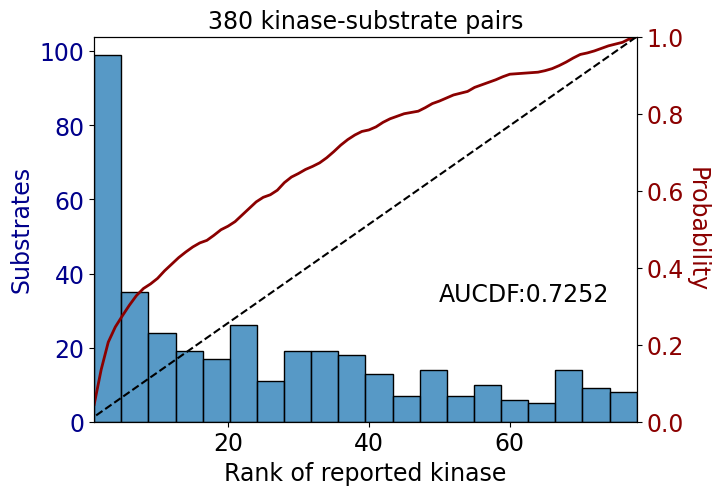

np.float64(0.725206611570248)

In [387]:
get_AUCDF(df_tyr,'rank')

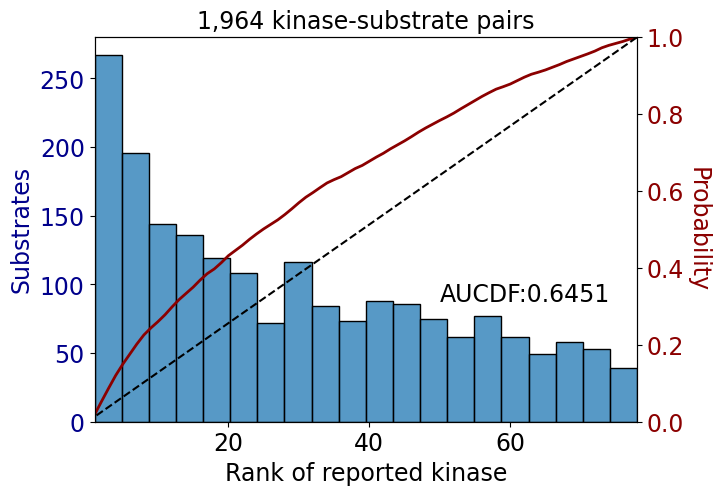

np.float64(0.6451329044786989)

In [335]:
get_AUCDF(psp_tyr,'rank')

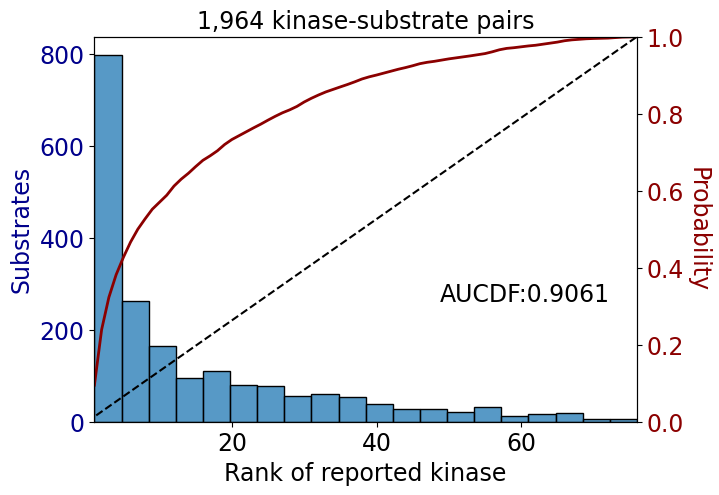

np.float64(0.9060721987810595)

In [234]:
get_AUCDF(psp_tyr,'rank')

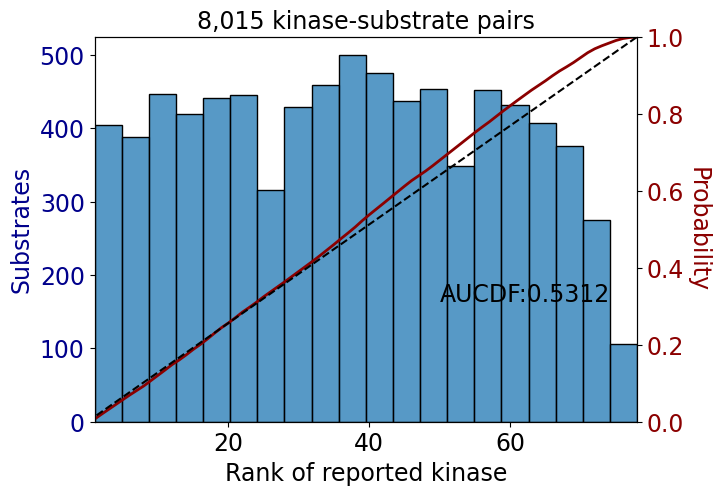

np.float64(0.53116507722515)

In [215]:
get_AUCDF(df_tyr,'rank')

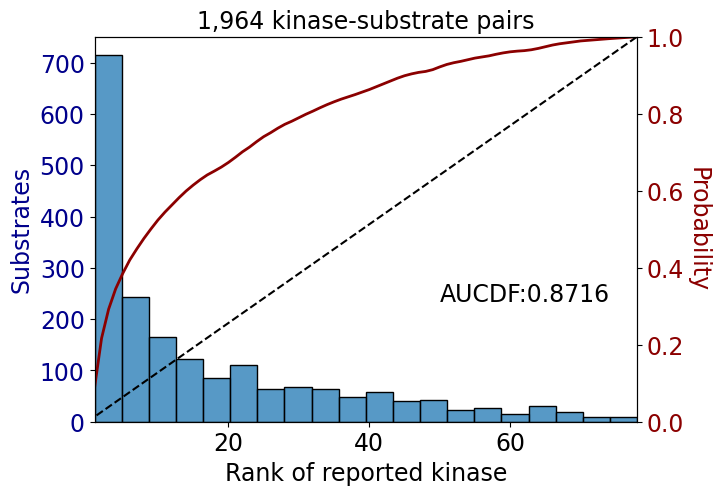

np.float64(0.8715525334280566)

In [201]:
get_AUCDF(psp_tyr,'rank')

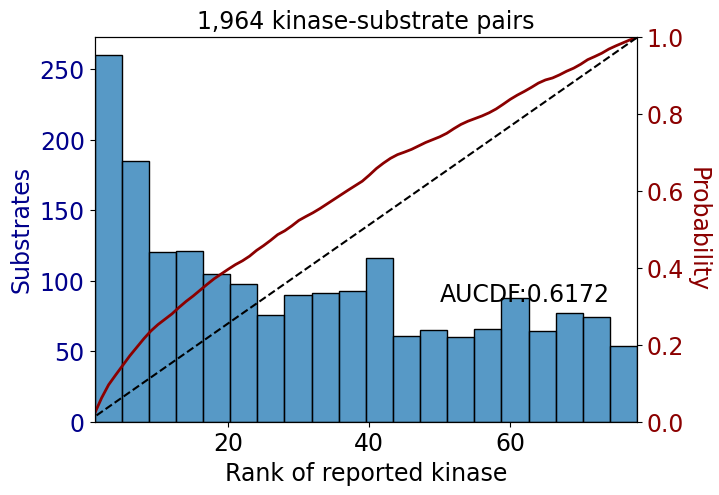

np.float64(0.6171673558333277)

In [185]:
get_AUCDF(psp_tyr,'rank')

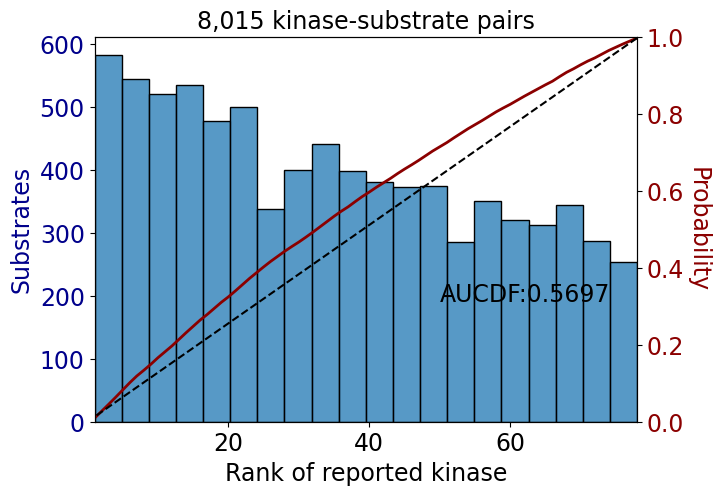

np.float64(0.5697483817509086)

In [154]:
get_AUCDF(df_tyr,'rank')

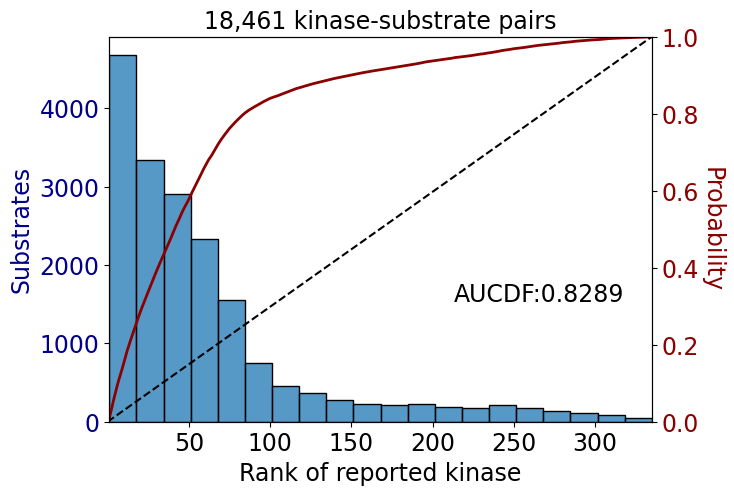

np.float64(0.8289094824229805)

In [21]:
get_AUCDF(data,'rank')

In [70]:
data_tk = data[data.kinase_group=='TK']
data_st = data[data.kinase_group!='TK']

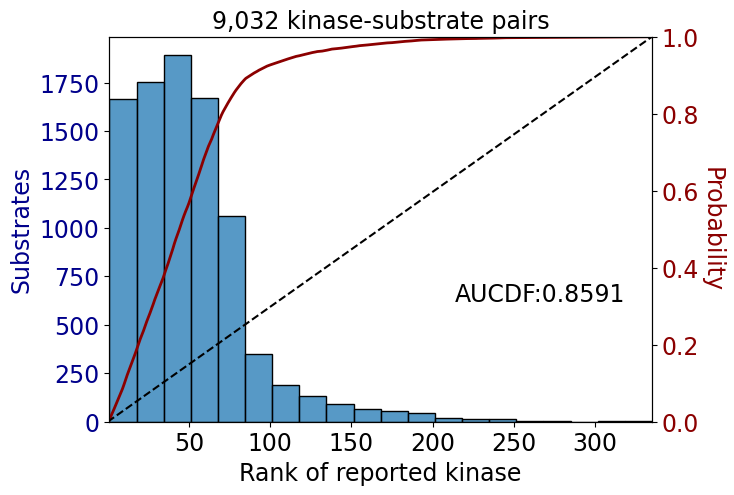

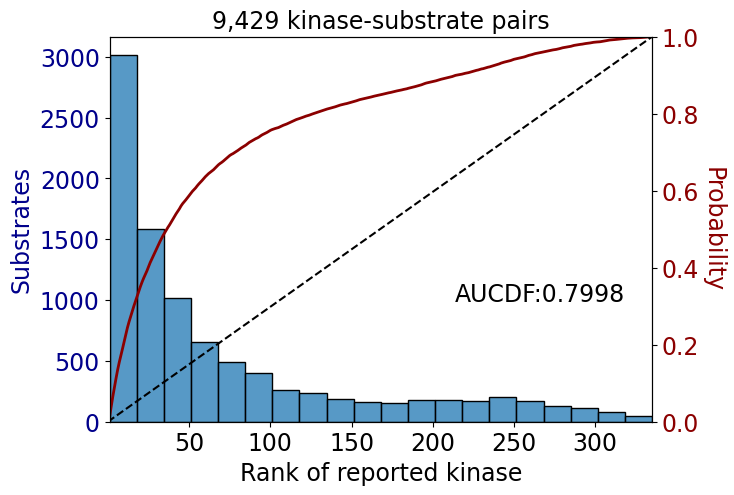

np.float64(0.7998083324521585)

In [71]:
get_AUCDF(data_tk,'rank')
get_AUCDF(data_st,'rank')

<Axes: >

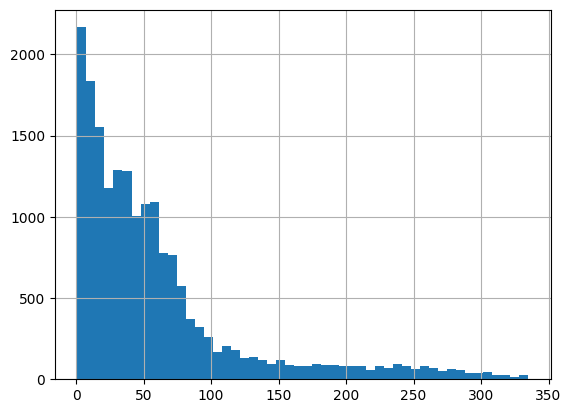

In [59]:
data['rank'].hist(bins=50)